In [44]:
import numpy as np

In [45]:
m = 100  
X = 2 * np.random.rand(m, 1) 
y = 4 + 3 * X + np.random.randn(m, 1)  

# Regressão Linear

In [46]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [47]:
theta_best

array([[3.63564518],
       [3.3380028 ]])

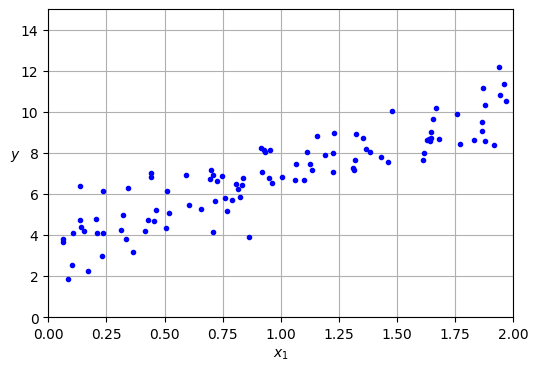

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [49]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [50]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.63564518],
       [10.31165078]])

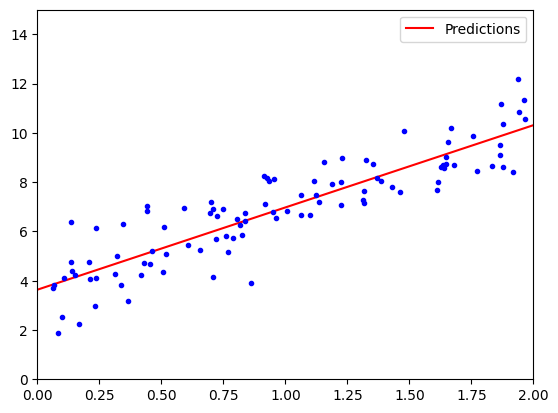

In [51]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [53]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.63564518]), array([[3.3380028]]))

In [54]:
lin_reg.predict(X_new)

array([[ 3.63564518],
       [10.31165078]])

In [55]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # Minimos Quadrados
theta_best_svd

array([[3.63564518],
       [3.3380028 ]])

In [56]:
np.linalg.pinv(X_b).dot(y)

array([[3.63564518],
       [3.3380028 ]])

# Gradiente Descendente

## Em lote

In [57]:
eta = 0.1   # Taxa de aprendizado
n_interactions = 1000
m = 100

theta = np.random.rand(2,1)

In [58]:
for iteration in range(n_interactions):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [59]:
theta

array([[3.63564518],
       [3.3380028 ]])

## Estocático

In [60]:
n_epochs = 50
t0, t1 = 5, 20  # Hiperparametros

def learning_schedule(t):
    return t0 / (t1 + t)

In [61]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [62]:
theta

array([[3.63125252],
       [3.35261778]])

In [63]:
from sklearn.linear_model import SGDRegressor

In [64]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [65]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.62403003]), array([3.39547555]))

# Regressão Polinomial

In [66]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

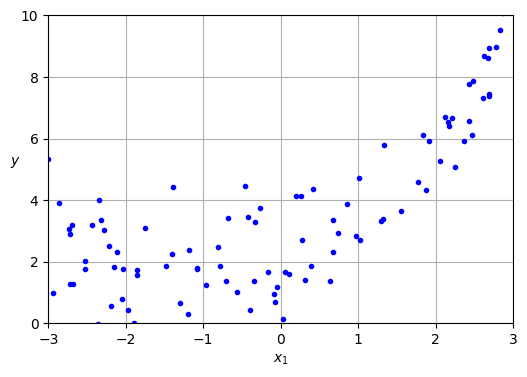

In [67]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [69]:
X_poly = poly_features.fit_transform(X)
X[0]

array([2.6838414])

In [70]:
X_poly[0]

array([2.6838414 , 7.20300464])

In [71]:
lin_reg = LinearRegression()

In [72]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98915058]), array([[1.03919785, 0.45585173]]))

Função Original: y = 0,5x² + x + 2 + ruido

Função Predita: y = 0,47x² + 92x + 2,12 + ruido

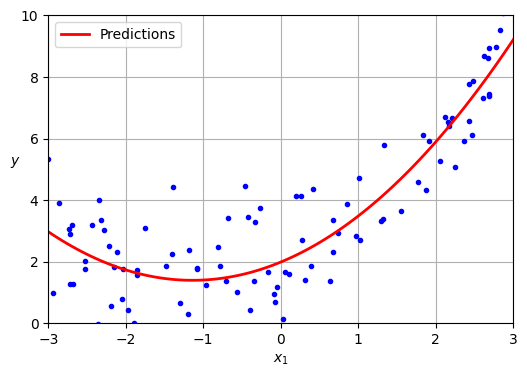

In [73]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Quanto maior o grau, maior a proximidade da equação verdadeira.

# Curva de Aprendizado

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Val')
    plt.legend()


Text(0, 0.5, 'RMSE')

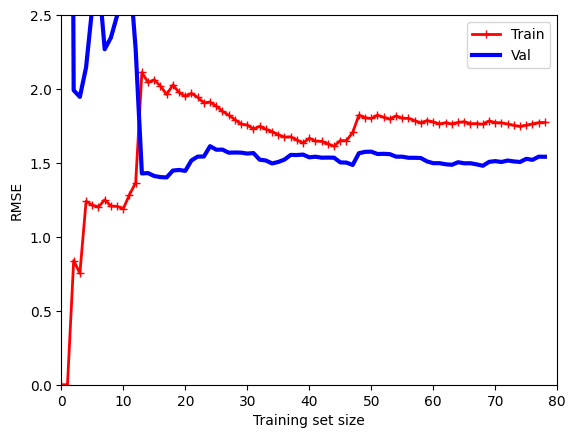

In [75]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 2.5])
plt.xlabel('Training set size')
plt.ylabel('RMSE')

In [76]:
from sklearn.pipeline import Pipeline

Curva de aprendizado em um polinomio de 10 graus (mesmos dados)

Text(0, 0.5, 'RMSE')

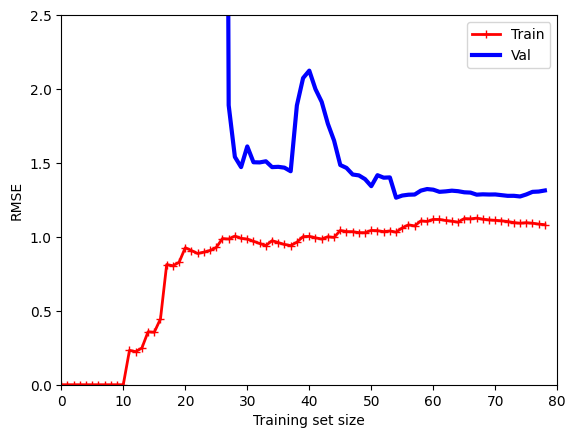

In [77]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 2.5])
plt.xlabel('Training set size')
plt.ylabel('RMSE')

Menor sobreajuste-----------------------------------------------------------Maior precisão

0-------------------------------------------------------------------------------->∞         Grau de Liberdade

Quanto menor o grau do polinimio (Liberdade), menor a chance de o modelo se sobreajustar aos dados (overfitting).

# Modelos Lineares Regularizados

In [93]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

## Ridge

Força o modelo a ajustar os dados e mantem o peso do modelo o menor possível

In [94]:
from sklearn.linear_model import Ridge

In [95]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [96]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

## Lasso

Define o peso de caracteristicas menos importantes como 0. 

A grosso modo, executa automaticamente a seleção de caracteristicas e gera um modelo com poucos pesos diferentes de 0.

In [97]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

Meio termo entre Ridge e Lasso. 

In [98]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

Ratio (R) vai entre 0 e 1, sendo r=0 equivalente à regressão Ridge e r=1 à Lasso.

In [99]:
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])